In [2]:
import BigBauss
import util
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('train.csv') #lire les données avec pandas (sourcée de Kaggle)
data = np.array(data)   #convertir en liste numpy
m, n = data.shape   #dimensions des données
np.random.shuffle(data)     #mélanger
data_test = data[0:1000].T  #séparer une partie des données pour tester la précicion du réseau
y_test = data_test[0]       #séparer x et y 
x_test = data_test[1:n]
x_test = x_test / 255.0     #diviser x par 255 pour obtenir des valeurs entre 0 et 1

data_train = data[1000:m].T     #appliquer la même méthode au données d'entrainement
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train / 255.0

#new coords pour graph


In [5]:
structure = [784,16,16,10]
network1 = BigBauss.Network(structure,optimizer="gradient descent")

network2 = BigBauss.Network(structure,optimizer="gradient descent momentum")
network2.weights = copy.deepcopy(network1.weights)
network2.biases = copy.deepcopy(network1.biases)

network3 = BigBauss.Network(structure,optimizer="adadelta mini batch")
network3.weights = copy.deepcopy(network1.weights)
network3.biases = copy.deepcopy(network1.biases)

network4 = BigBauss.Network(structure,optimizer="adam")
network4.weights = copy.deepcopy(network1.weights)
network4.biases = copy.deepcopy(network1.biases)

network5 = BigBauss.Network(structure,optimizer= "adam mini batch")
network5.weights = copy.deepcopy(network1.weights)
network5.biases = copy.deepcopy(network1.biases)


networks = [network1,network2,network3,network4,network5]
x_plot = [[] for i in range(5)]
y_plot = [[] for i in range(5)]

for n in range(10):   #cycles d'entrainement
        
    for i,network in enumerate(networks):
        network.train(x_train,y_train)
        x_plot[i].append(n)
        y_plot[i].append(util.get_accuracy(util.get_predictions(network.feed_forward(x_test)),y_test))


    




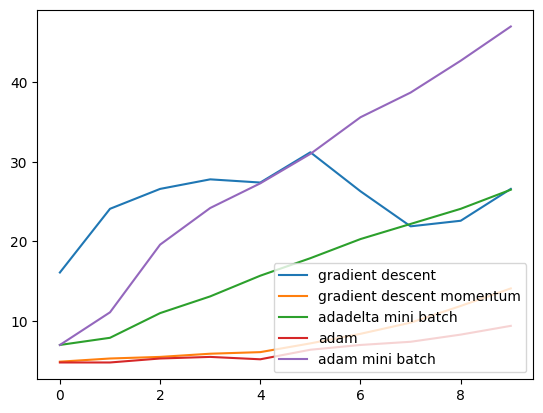

In [9]:
for i in range(len(networks)):
    plt.plot(x_plot[i],y_plot[i])
plt.legend(["gradient descent","gradient descent momentum","adadelta mini batch","adam","adam mini batch"],loc="lower right")
plt.show()